<a href="https://colab.research.google.com/github/victoriahebling/ANN/blob/main/Trabalho1_RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('\033[1;37;44mTrabalho 1 - Disciplina: Tópicos Especiais em Engenharia Bioquímica II: Redes neurais aplicadas a Engenharia Química \n\nAluna: Victória Hebling Arroyo\033[m')

Trabalho 1 - Disciplina: Tópicos Especiais em Engenharia Bioquímica II: Redes neurais aplicadas a Engenharia Química 

Aluna: Victória Hebling Arroyo


In [ ]:
print('ARTIGO SELECIONADO')
print('Título: Modeling the adsorption of benzeneacetic acid on CaO2 nanoparticles using artificial neural network')
print('Autores: Sapana S. Madan a, Kailas L. Wasewar a,*, S.L. Pandharipande\n')
print('INFORMAÇÕES\nPara construir a tabela de dados .cvs abreviou-se o nome das variavéis. Sendo elas:')
print('Ci: Initial Concentration of Benzeneacetic acid')
print('CaO2: Absorbent dosage of CaO2 nanoparticles')
print('Ce: Equilibrium Conc. of Benzeneacetic acid')
print('Qtdabs: Amount of CaO2 nanoparticles absorbed')
print('Efic: % Removal efficiency')

ARTIGO SELECIONADO
Título: Modeling the adsorption of benzeneacetic acid on CaO2 nanoparticles using artificial neural network
Autores: Sapana S. Madan a, Kailas L. Wasewar a,*, S.L. Pandharipande

INFORMAÇÕES
Para construir a tabela de dados .cvs abreviou-se o nome das variavéis. Sendo elas:
Ci: Initial Concentration of Benzeneacetic acid
CaO2: Absorbent dosage of CaO2 nanoparticles
Ce: Equilibrium Conc. of Benzeneacetic acid
Qtdabs: Amount of CaO2 nanoparticles absorbed
Efic: % Removal efficiency


In [ ]:
#importação de bibliotecas 
''' O primeiro passo ao programar uma rede neural é a importação das 
bibliotecas que serão utilizadas, de forma a utilizar módulos e funções 
que minimizem o código'''

import numpy as np
'''O NumPy é uma biblioteca para a linguagem Python com funções 
para se trabalhar com computação numérica. Neste caso estamos 
chamando numpy de np para economizar tempo na digitação deste código'''

import pandas as pd
'''Pandas é um biblioteca para manipulação e análise de dados. 
Neste caso estamos chamando pandas de pd para economizar tempo 
na digitação deste código'''

import matplotlib.pyplot as plt
'''Matplotlib.pyplot serve para plotar gráficos, sendo que esta
biblioteca permite a personalização dos gráficos, tais como: tamanho
da figura, largura da linha, cor, estilo e etc...'''

from sklearn.neural_network import MLPRegressor 
'''Como a variável do artigo selecionado é contínua, então usaremos
 para este aprendizado a classe de algoritmo denominada Regressão,
 sendo esta encontrada dentro da biblioteca sklearn.neural_network.'''

from sklearn.metrics import mean_squared_error
'''sklearn.metricas é uma biblioteca que serve para cálculos de métricas,
tais como mean squared error (soma dos quadrados dos desvios)'''

from sklearn.metrics import r2_score 
'''sklearn.metricas é uma biblioteca que serve para cálculos de métricas,
tais como o r2 que serve para ver como está o ajuste dos dados, sendo que
quanto mais próximo de 1, melhor está o ajuste dos dados'''


'sklearn.metricas é uma biblioteca que serve para cálculos de métricas,\ntais como o r2 que serve para ver como está o ajuste dos dados, sendo que\nquanto mais próximo de 1, melhor está o ajuste dos dados'

In [ ]:
# abrindo o arquivo .csv a partir do repositório do Github
''' Após a importação das bibliotecas, é importante que os dados importados
para o colab, sendo assim, colocou-se a planilha no gihub e ao acessar 
os dados que foram colocados, clicou-se em raw e desta forma, abriu-se o arquivo
de forma simples. É importante ressaltar que é interessante que o formato do
excel a ser colodo no github seja .csv (comma separated values), para
que os dados não sejam corrompidos. Além disso, comando abaixo utilizou-se delimiter
visto que ao salvar o arquivo .csv no excel este estava usando ; para separar
as colunas e não , como o próprio nome diz (csv=valores separados por vírgulas) '''

link = 'https://raw.githubusercontent.com/victoriahebling/ANN/main/dadosANN2.csv'
df = pd.read_csv(link,delimiter=';')

In [ ]:
#checando se o arquivo .csv abre normalmente
'''Antes de prosseguirmos com o código é interessante sabermos se o arquivo
está sendo aberto corretamente, para isto, o programa irá analisar as três
primeiras linhas, sendo a palavra head, do inglês, cabeça, ou seja, o presente
código abaixo irá imprimir as linhas iniciais'''

print('Três primeiras linhas')
df.head(3)


Três primeiras linhas


,No,Ci,CaO2,Ce,Qtdabs,Efic
0,1,0.099,0.002,0.062,0.049,36.87
1,2,0.099,0.004,0.057,0.056,41.92
2,3,0.099,0.006,0.063,0.048,35.86


In [ ]:
#checando se o arquivo .csv abre norlmalmente
'''Para sabermos se o arquivo está sendo aberto corretamente, é interessante
saber se está imprimindo os últimos dados corretamente, sendo assim, utilizamos
o comando tail, do inglês, cauda, ou seja, o presente código abaixo irá imprimir
as últimas linhas'''

print('Três últimas linhas')
df.tail(3)

Três últimas linhas


,No,Ci,CaO2,Ce,Qtdabs,Efic
13,14,0.05,0.01,0.020,0.041,60.0
14,15,0.04,0.01,0.006,0.047,86.3
15,16,0.03,0.01,0.004,0.036,88.3


In [ ]:
# separando as colunas que são de interesse
''' Como não são todas as linhas que possuem relevância para a construção 
desta rede neural, iremos selecionar quais são as colunas de interesse'''

selectDATA=[]
''' Antes de selecionar quais colunas são de nosso interesse, criaremos uma
lista denominada selectDATA que inicialmente está vazia'''

selectDATA=df.iloc[:,[1,2,3,4,5]].copy()
''' através do comando iloc (index location), iremos localizar quais são
os dados de interesse para a análise, sendo que dentro deste comando, :
indica que todas as linhas de dados serão selecionadas, e [1,2,3,4,5]
indica que serão selecionadas as colunas de 1 a 5. Vale ressaltar que, a
coluna 1 refere-se a segunda coluna da planilha de dados, visto que, no
Python a contagem de linhas e colunas se inicia no 0. Além disto, o comando
.copy() serve para que mão sejam feitas associações lógicas'''


' através do comando iloc (index location), iremos localizar quais são\nos dados de interesse para a análise, sendo que dentro deste comando, :\nindica que todas as linhas de dados serão selecionadas, e [1,2,3,4,5]\nindica que serão selecionadas as colunas de 1 a 5. Vale ressaltar que, a\ncoluna 1 refere-se a segunda coluna da planilha de dados, visto que, no\nPython a contagem de linhas e colunas se inicia no 0. Além disto, o comando\n.copy() serve para que mão sejam feitas associações lógicas'

In [ ]:
# checando se as colunas e linhas selecionadas abrem normalmente
'''Da mesma forma como fizemos anteriormente para ver o arquivo do github
abria normalmente, iremos analisar se realmente foram selecionados os 
dados de interesse a partir do comando de Index location utilizado anteriormente'''

selectDATA.head(3)


,Ci,CaO2,Ce,Qtdabs,Efic
0,0.099,0.002,0.062,0.049,36.87
1,0.099,0.004,0.057,0.056,41.92
2,0.099,0.006,0.063,0.048,35.86


In [ ]:
# funcao normatiza dados e função Original

def Funcao_normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max() #comando pra pegar o max
        min_x=x[i].min() #comando pra pegar o min
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

''' A função normatiza serve para normatizar os dados, ou seja, 
 transformar todas as variáveis na mesma ordem de grandeza. 

 variavel codificada = a+b*(x original)
    quando x original for x max, o valor codificado vai ser 1
    1 = a+b(x maximo)
    quando x oroginal for x min, o valor codificafo vai ser -1
    -1 =a+b(x minimo)
    então multiplicando essa ultima equação por (-1) e somando
    2 = b(x maximo - x minimo)
    entao consegue calcular o b passando dividindo, 
    joga dps na equação e acha o a'''


' A função normatiza serve para normatizar os dados, ou seja, \n transformar todas as variáveis na mesma ordem de grandeza. \n\n variavel codificada = a+b*(x original)\n    quando x original for x max, o valor codificado vai ser 1\n    1 = a+b(x maximo)\n    quando x oroginal for x min, o valor codificafo vai ser -1\n    -1 =a+b(x minimo)\n    então multiplicando essa ultima equação por (-1) e somando\n    2 = b(x maximo - x minimo)\n    entao consegue calcular o b passando dividindo, \n    joga dps na equação e acha o a'

In [ ]:
DAT_1=[]
DAT_1=selectDATA.copy()
DAT=Funcao_normatiza(selectDATA) 

''' Primeiramente criou-se uma lista vazia com DAT_1 e posteriormente
chamou-se a função (Funcao_normatiza), inserindo os dados selectDATA
nesta função'''

' Primeiramente criou-se uma lista vazia com DAT_1 e posteriormente\nchamou-se a função (Funcao_normatiza), inserindo os dados selectDATA\nnesta função'

In [ ]:
DAT.head(3)

'''Analisando se deu certa a normalização realizada, sendo head(3) o comando
que nos permite analisar os 3 primeiros dados. Como se pode observar abaixo
os dados foram normatizados entre -1 e 1.'''

'Analisando se deu certa a normalização realizada, sendo head(3) o comando\nque nos permite analisar os 3 primeiros dados. Como se pode observar abaixo\nos dados foram normatizados entre -1 e 1.'

In [ ]:
# separa os dados em treino 
treino=DAT.sample(frac=0.8,random_state=None) 
'''sample é um comando que mistura os dados para não ficar tendencioso.
frac = 0.8 significa que 80% dos dados serão para treino 
 Já o random_state serve para aleatorizar'''


'sample é um comando que mistura os dados para não ficar tendencioso.\nfrac = 0.8 significa que 80% dos dados serão para treino \n Já o random_state serve para aleatorizar'

In [ ]:
# separa os dados em teste
test=DAT.drop(treino.index)
''' o comando drop serve para indicar que os dados que não foram para teste,
irão para treino, ou seja, 20% dos dados.'''

' o comando drop serve para indicar que os dados que não foram para teste,\nirão para treino, ou seja, 20% dos dados.'

In [ ]:
treino.head(3)

,Ci,CaO2,Ce,Qtdabs,Efic
12,-0.130435,-0.666667,-0.166667,-0.877551,-0.372587
5,1.000000,-0.250000,0.194444,-0.204082,-0.192223
11,0.159420,-0.666667,0.055556,-0.816327,-0.480143


In [ ]:
# obtem as variaveis independentes (treino e teste)
'''através do comando iloc (index location), iremos localizar quais são
os dados referentes a variáceis independentes. Neste caso, selecionou-se
todas as linhas e apenas as colunas Ci e CaO2 (colunas 0 e 1)'''

x_treino=treino.iloc[:,[0,1]] 
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_1.iloc[:,[0,1]]

In [ ]:
# obtem as variaveis dependentes (treino e teste)
Index=[4]  
'''Desta forma selecionou-se apenas a coluna 4 como sendo variável dependente,
ou seja, a variável Efic. Poderia ter sido feito para todas (Ce, Qtdabs e Efic),
no entando, para fins didáticos utilizou-se apenas a coluna Efic'''

y_train=treino.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_1.iloc[:,Index]

'''O comando .loc[:, Index] indica que todas as linhas foram selecionadas 
e somente as colunas indicadas anteriormente pela lista Index foram selecionadas,
ou seja apenas a coluna 4.'''

'O comando .loc[:, Index] indica que todas as linhas foram selecionadas \ne somente as colunas indicadas anteriormente pela lista Index foram selecionadas,\nou seja apenas a coluna 4.'

In [ ]:
# define a rede neural 
clf = MLPRegressor(solver='lbfgs',activation='tanh', max_iter=100, alpha=1e-5,hidden_layer_sizes=(5, 5), random_state=1)

'''armazenou-se essa rede neural no nome clf, e utilizou-se o módulo MLPRegressor
do sklearn, visto que Efic é uma variácel contínua e não categórica, logo, utiliza-se
a regressão e não classificação. 
  O solver é o algoritmo que vai ser usado para resolver esta rede neural, como neste
artigo não tem muitos dados, a preferência foi pelo lbfgs, visto que para usar o adam
seria melhor que tivessem mais dados.
  Activation é a função de ativação.
  alpha é um criterio de parada associado ao erro do processo 
  hidden_layer_size = neuronios na camada oculta, essa rede tem duas camadas, ambas com
cinco neurônios cada. Colocou-se essa quantidade de neurônios, pois, no artigo a rede neural
possui esta arquitetura.
  random_state serve para aleatorizar os dados'''

'armazenou-se essa rede neural no nome clf, e utilizou-se o módulo MLPRegressor\ndo sklearn, visto que Efic é uma variácel contínua e não categórica, logo, utiliza-se\na regressão e não classificação. \n  O solver é o algoritmo que vai ser usado para resolver esta rede neural, como neste\nartigo não tem muitos dados, a preferência foi pelo lbfgs, visto que para usar o adam\nseria melhor que tivessem mais dados.\n  Activation é a função de ativação.\n  alpha é um criterio de parada associado ao erro do processo \n  hidden_layer_size = neuronios na camada oculta, essa rede tem duas camadas, ambas com\ncinco neurônios cada. Colocou-se essa quantidade de neurônios, pois, no artigo a rede neural\npossui esta arquitetura.\n  random_state serve para aleatorizar os dados'

In [ ]:
# treina a rede neural
clf.fit(x_treino, y_train)
'''nesse momento treinou-se a rede, fez o fit para fazer o ajuste.'''

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'nesse momento treinou-se a rede, fez o fit para fazer o ajuste.'

In [ ]:
# usa a rede neural treina em calculos para treino e teste
'''validamos em treino e teste, mas poderiamos ter validado em treino, teste e 
validação, mas como não tem muitos pontos não seria legal estar fazendo isso.
'''
y_calc_train=clf.predict(x_treino)
'''aqui testou a rede, fez uma predição de resposta.
Quando poe o nome.predict ele usa aquilo que treinei'''

y_calc_test=clf.predict(x_test)

In [ ]:
# transforma a saida da rede em dataframe 
'''preparando a resposta só para gente comparar'''
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
'''vai voltar do intervalo -1 e 1 para o intervalo original que tinha'''

y_calc_train= Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [ ]:
# recupera os dados originais 
test=[]
treino=[]
treino=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [ ]:
treino

,Efic
12,47.50
5,54.04
11,43.60
15,88.30
13,60.00
1,41.92
2,35.86
7,94.95
0,36.87
4,34.34


In [ ]:
# escolhe uma das resposta para fazer o grafico (Efic-treino)
efic_obs_train=[]
efic_calc_train=[]
efic_calc_train=y_calc_train['Efic'].copy()
efic_obs_train=treino['Efic'].copy()

In [ ]:
# escolhe uma das resposta para fazer o grafico (Efic-teste)
efic_obs_test=[]
efic_calc_test=[]
efic_calc_test=y_calc_test['Efic'].copy()
efic_obs_test=test['Efic'].copy()

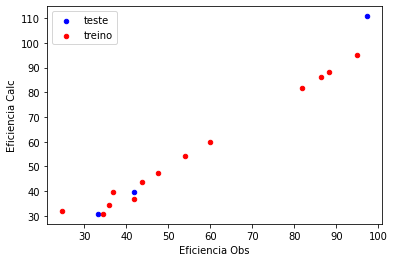

'mostrando o gráfico plotado'

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
''' 
A forma como o gráfico está sendo plotado quer dizer que:
fig.add_subplot(ROW,COLUMN,POSITION)

ROW = número de linhas
COLUMN = número de colunas
POSIÇÃO = posição do gráfico que está sendo traçado

Ou seja, o gráfico está sendo plotado com uma linha, uma coluna e na primeira posição'''

ax1.scatter(efic_obs_test,efic_calc_test, s=20, c='b', marker="o", label='teste')
ax1.scatter(efic_obs_train,efic_calc_train, s=20, c='r', marker="o", label='treino')

''' s representa o tamanho dos pontos do gráfico, c representa a cor (Ex: b=blue e r=red), 
marker representa o tipo de marcação (Ex: quadrado (s), círculo(c)) e label 
representa a legenda'''

plt.legend(loc='upper left')
''' A legenda do gráfico está sendo plotada na loc (localização) superior à esquerda'''

plt.ylabel('Eficiencia Calc')
''' Colocando nome do eixo y'''

plt.xlabel('Eficiencia Obs')
'''Colocando nome do eixo x'''

plt.show()
'''mostrando o gráfico plotado'''

In [ ]:
mse=mean_squared_error(efic_obs_test,efic_calc_test)
print("MSE teste=",mse)
R2=r2_score(efic_obs_test,efic_calc_test)
print("R^2 teste=",R2)

MSE teste= 64.94456906129791
R^2 teste= 0.9191780237501274


In [ ]:
mse=mean_squared_error(efic_obs_train,efic_calc_train)
print("MSE treino=",mse)
R2=r2_score(efic_obs_train,efic_calc_train)
print("R^2 treino=",R2)

MSE treino= 7.890712727638036
R^2 treino= 0.9849284626804219


In [ ]:
print('CONCLUSÕES:\nObserva-se que o R2 tanto do teste quanto do treino foi próximo de 1 o que indica um bom ajuste de dados')

CONCLUSÕES:
Observa-se que o R2 tanto do teste quanto do treino foi próximo de 1 o que indica um bom ajuste de dados
